## NG Solve start

defining the geometry

In [31]:
from ngsolve import *
from netgen.occ import *
from ngsolve.webgui import * 
from matplotlib import pyplot as plt

#geometry

shape = MoveTo(0,0).Rectangle (28,4).Face()
#house =MoveTo(-7,5).Rectangle (2,2).Face()
rect = shape #- house
rect.edges.name = "shore"

#rect.edges.Min(X).name = "coast"
#line.edge.name = "coast"

geo = OCCGeometry(rect,dim=2)
#H_bg = 2.0
#A = 16.0 # peak amplitude (on top of the background)
#x0,y0 = 20.0,  0.0 # center of the peak (e.g. near the left wall)
#sigma = 6.0 # width of the peak

#b = CF( A * exp(-((x - x0)**2 + (y - y0)**2) / sigma**2) )

creating a mesh

In [32]:
from ngsolve import *
from ngsolve.webgui import Draw
mesh = Mesh(geo.GenerateMesh(maxh=2))
mesh.Curve(3)
Draw(mesh)

#Draw(b,mesh,"Grundhöhe")

WebGuiWidget(layout=Layout(height='500px', width='100%'), value={'gui_settings': {}, 'ngsolve_version': '6.2.2…

BaseWebGuiScene

Vectorial approximation space

In [33]:
#order = 2
#fes = L2(mesh,order=order)**3

fes = H1(mesh, order=2, dirichlet="bottom|right")
fes.ndof  # number of unknowns in this space


141

initial & boundary conditions

In [34]:

u = fes.TrialFunction()
v = fes.TestFunction()
gfu = GridFunction(fes)

#short version:
#u,v = fes.TnT()         # U is solution-function, V is test-function


define the solution of poisson equation & playing with it

we have a pde-problem - here its a poisson equation with
- laplace(u) = f_pde              on Omega
- u = 0                           on boundary of Omega

WebGuiWidget(layout=Layout(height='500px', width='100%'), value={'gui_settings': {}, 'ngsolve_version': '6.2.2…

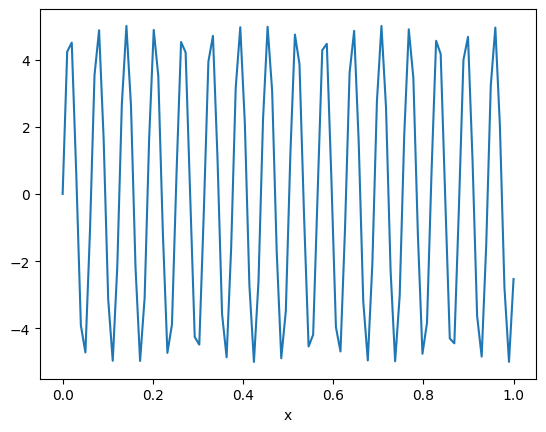

In [71]:
#define a function for PDE: laplace(u)=f auf Omega
from ngsolve import sin, cos

# -- GRADIENT of a function
# g_h1 = GridFunction(fes)
# g_pde = 5*y*sin(100*x)
# g_h1.Set(g_pde)
# grad_g = grad(g_h1)
# Draw(grad_g,mesh,vectors={"grid_size": 30})

g_vec = CF((x,y*x**2*sin(50*x*y)))
Draw(g_vec,mesh,vectors=True)


#k = Parameter(5.0)      # set a parameter for f
f_pde = 5*y*sin(100*x)

#Draw(f_pde,mesh)   # draws the function with the mesh

# -- SOLVE FUNCTION AT A CERTAIN POINT, f_pde(x0,y0) is not possible!!
# mip = mesh(2.0,2.0)
# value = f_pde(mip)
# # print(value)

# -- SOLVE SET OF POINTS
# import numpy as np
# X = np.linspace(0, 1, num=11)
# Y = np.ones_like(X) * 0.2
# print("values: \n", f_pde(mesh(X, Y)))

# -- INTEGRATE 
# integration_result = Integrate(f_pde, mesh, order=5)
# print(integration_result)

# -- DERIVATE and DRAW
# Xdiff_f_pde = f_pde.Diff(x)
# Ydiff_f_pde = f_pde.Diff(y)
# Draw(Xdiff_f_pde, mesh, "derivate")
# Draw(Ydiff_f_pde, mesh, "derivate")

X = np.linspace(0,1,num=100)
Y = np.ones_like(X * 0.2)
plt.plot(X,f_pde(mesh(X,Y)))
plt.xlabel("x")
plt.show()


assemble bilinear/linear forms

In [72]:

a = BilinearForm(fes)
a += grad(u)*grad(v)*dx     
a.Assemble()

f = LinearForm(fes)
f += f_pde*v*dx
f.Assemble()

#short version:
#a = BilinearForm(grad(u)*grad(v)*dx).Assemble()
#f = LinearForm(x*v*dx).Assemble()


solve the system

In [73]:
gfu.vec.data = \
    a.mat.Inverse(freedofs=fes.FreeDofs()) * f.vec
Draw(gfu);


WebGuiWidget(layout=Layout(height='500px', width='100%'), value={'gui_settings': {}, 'ngsolve_version': '6.2.2…